In [1]:
!pip install torch==2.4.0 torchvision==0.19.0 torchaudio==2.4.0 --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.0/195.0 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.4 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.5.0+cu121
    Uninstalling torch-2.5.0+cu121:
      Successfully uninstalled torch-2.5.0+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.0+cu121
    Uninstalling torchvision-0.20.0+cu121:
      Successfully uninstalled torchvision-0.20.0+cu121
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.5.0+cu121
    Uninstalling torchaudio-2.5.0+cu121:
      Successfully uninstalled torchaudio-2.5.0+cu121


In [2]:
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.4.0+cpu.html

Looking in links: https://data.pyg.org/whl/torch-2.4.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.0/541.0 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 787.5/787.5 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 18.0 MB/s eta 0:00:00


In [3]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.2 MB/s eta 0:00:00


In [36]:
!pip install networkx

# Bulit-in dataset Cora

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch_geometric
import networkx as nx
import seaborn as sn

## Get dataset

In [5]:
cora_dataset = torch_geometric.datasets.CoraFull(root='/data')

Processing...
Done!


In [7]:
cora_dataset.get_summary()

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/summary.py:34: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1808.)
  std=data.std().item(),


CoraFull (#graphs=1):
+------------+----------+----------+
|            |   #nodes |   #edges |
|------------+----------+----------|
| mean       |    19793 |   126842 |
| std        |      nan |      nan |
| min        |    19793 |   126842 |
| quantile25 |    19793 |   126842 |
| median     |    19793 |   126842 |
| quantile75 |    19793 |   126842 |
| max        |    19793 |   126842 |
+------------+----------+----------+

In [8]:
cora_dataset.num_classes

70

In [9]:
cora_dataset.data

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Data(x=[19793, 8710], edge_index=[2, 126842], y=[19793])

In [19]:
cora_dataset.data.has_isolated_nodes(),cora_dataset.data.has_self_loops()

(False, False)

In [22]:
cora_dataset.data.is_directed()

False

In [24]:
cora_dataset.data.num_node_types

1

In [23]:
cora_dataset.data.edge_index

tensor([[    0,     0,     0,  ..., 19791, 19791, 19792],
        [ 1227,  4021,  4056,  ...,  5100, 10850,  2947]])

In [28]:
degrees = torch_geometric.utils.degree(cora_dataset.data.edge_index[0],num_nodes=cora_dataset.data.num_nodes).numpy()

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


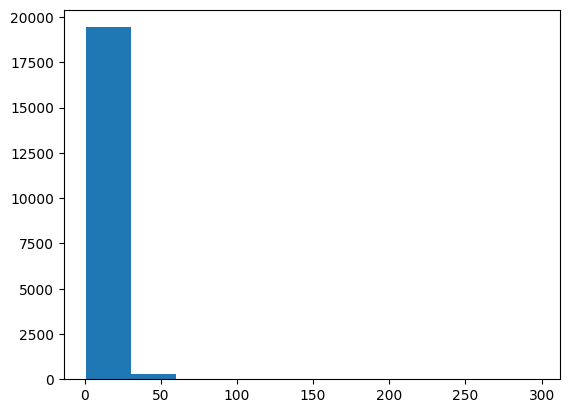

In [32]:
plt.hist(degrees)
plt.show()

In [35]:
pd.Series(degrees).describe()

,0
count,19793.000000
mean,6.408427
std,8.789928
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,297.000000


In [40]:
networkx_graph =torch_geometric.utils.to_networkx(cora_dataset.data,to_undirected=True)

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


In [43]:
#nx.draw(networkx_graph, with_labels=True, font_weight='bold')
# unable to plot whole graph

In [45]:
sources, targets = cora_dataset.data.edge_index

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


In [51]:
points = [0]+targets[np.where(sources==0)[0]].numpy().tolist()

In [54]:
zero_node = networkx_graph.subgraph(points)

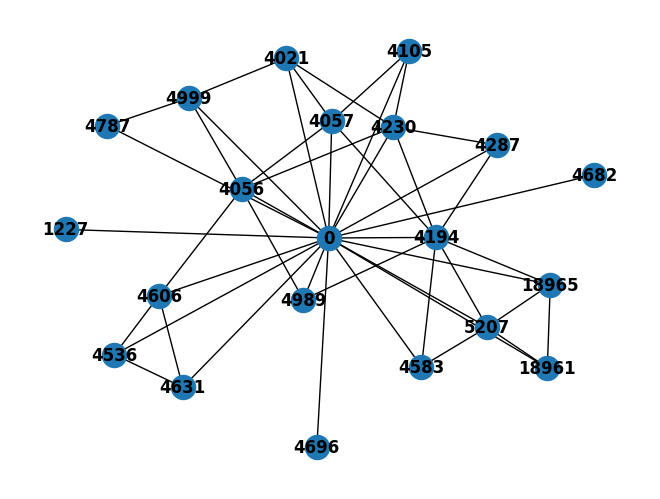

In [55]:
nx.draw(zero_node, with_labels=True, font_weight='bold')

In [58]:
pd.Series(cora_dataset.data.y.numpy()).describe()

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


,0
count,19793.000000
mean,33.431466
std,18.642806
min,0.000000
25%,19.000000
50%,33.000000
75%,51.000000
max,69.000000


<Axes: xlabel='count'>

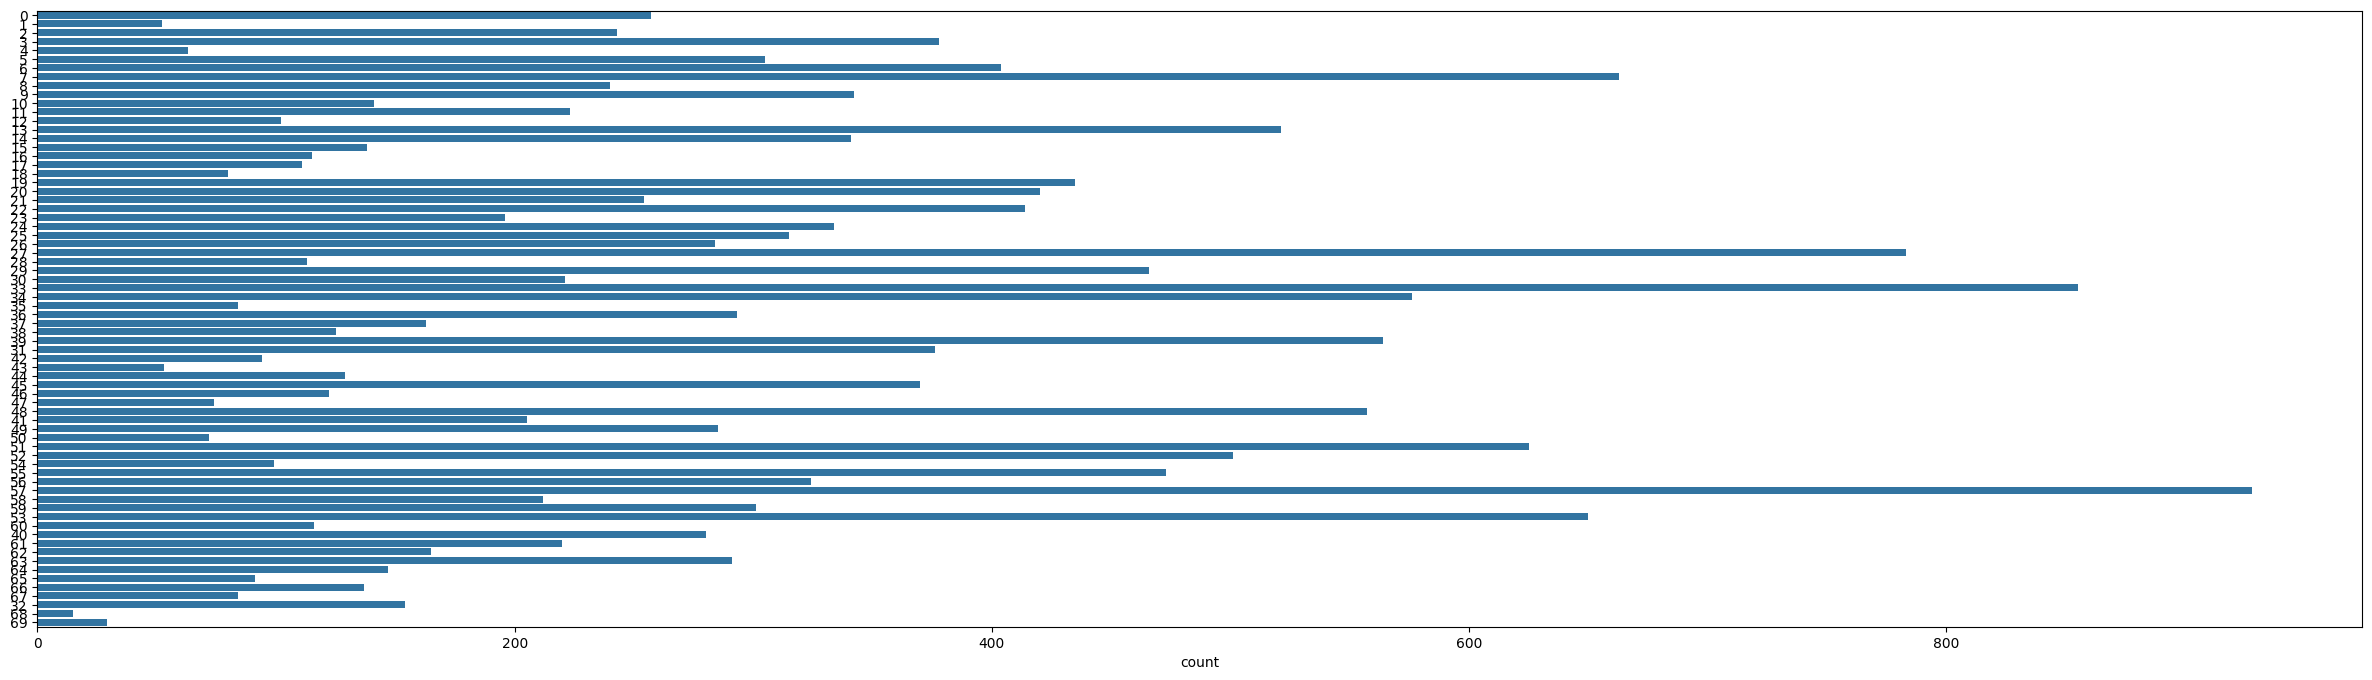

In [69]:
plt.figure(figsize=(30,8))
sn.countplot(cora_dataset.data.y.numpy().astype(np.string_))

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


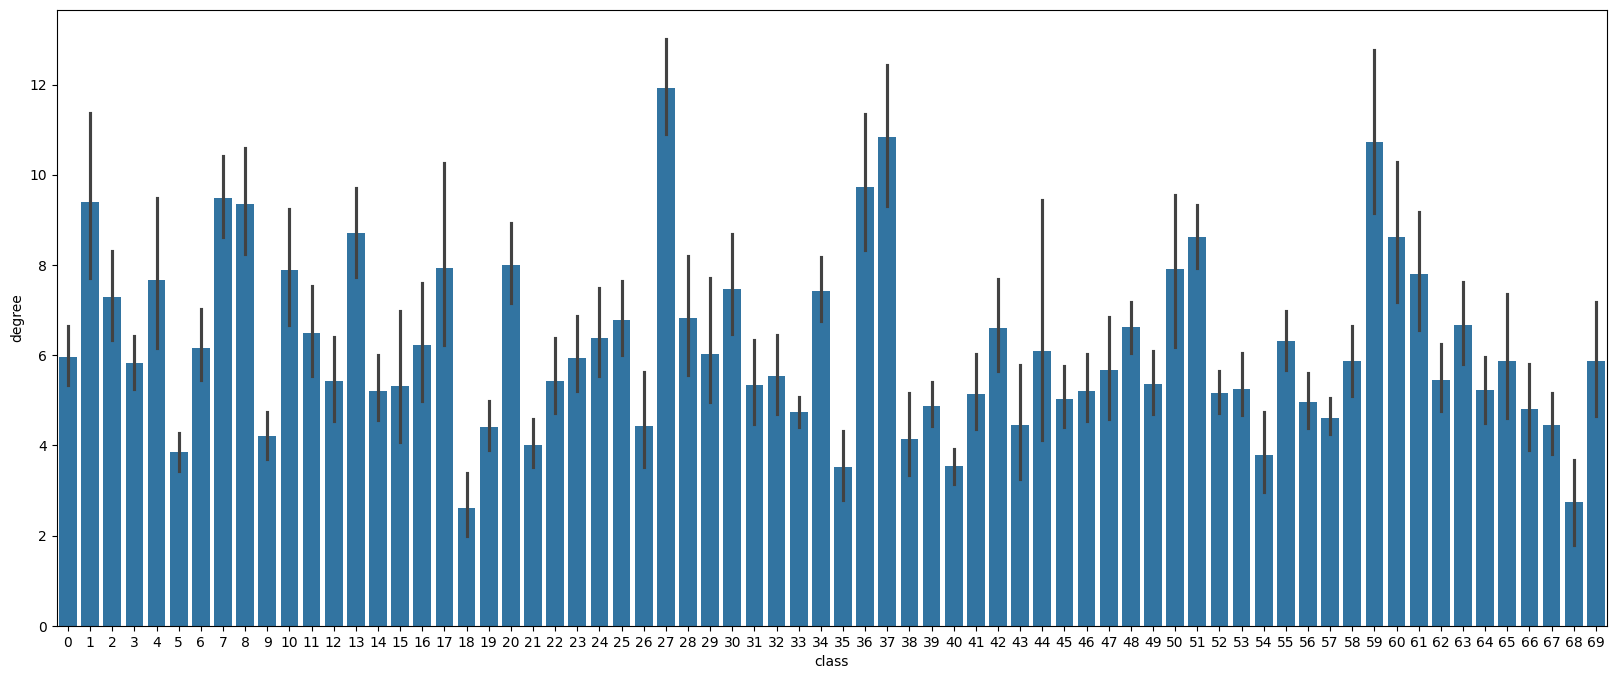

In [75]:
plt.figure(figsize=(20,8))
sn.barplot(data = pd.DataFrame({"degree":degrees,"class":cora_dataset.data.y}),
           x='class',y='degree')
plt.show()

In [76]:
splitter = torch_geometric.transforms.RandomNodeSplit()

In [78]:
cora_splits = splitter.forward(cora_dataset.data)

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


In [79]:
cora_splits

Data(x=[19793, 8710], edge_index=[2, 126842], y=[19793], train_mask=[19793], val_mask=[19793], test_mask=[19793])

In [86]:
torch.where(cora_splits.train_mask==True)[0].shape[0]/cora_splits.num_nodes*100

92.42156317890164

In [87]:
torch.where(cora_splits.val_mask==True)[0].shape[0]/cora_splits.num_nodes*100

2.5261456070327895

In [88]:
torch.where(cora_splits.test_mask==True)[0].shape[0]/cora_splits.num_nodes*100

5.052291214065579

In [92]:
pd.Series(cora_splits.y[torch.where(cora_splits.train_mask==True)[0]].numpy()).nunique()

70

In [93]:
pd.Series(cora_splits.y[torch.where(cora_splits.val_mask==True)[0]].numpy()).nunique()

67

In [94]:
pd.Series(cora_splits.y[torch.where(cora_splits.test_mask==True)[0]].numpy()).nunique()

70